##ML-2 Internal Graded Assessment - 40 marks - Duration - 3 hrs

____________

### DATASET INFORMATION: 

This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students



* sl_no	  == Serial Number
* gender	  == Gender- Male='M',Female='F'
* ssc_p	  == Secondary Education percentage- 10th Grade
* ssc_b	  == Board of Education- Central/ Others
* hsc_p	  == Higher Secondary Education percentage- 12th Grade
* hsc_b	  == Board of Education- Central/ Others
* hsc_s	  == Specialization in Higher Secondary Education
* degree_p	  == Degree Percentage
* degree_t	  == Under Graduation(Degree type)- Field of degree education
* workex	  == Work Experience
* etest_p	  == Employability test percentage ( conducted by college)
* specialisation	  == Post Graduation(MBA)- Specialization
* mba_p	  == MBA percentage
* status	  == Status of placement- Placed/Not placed (dependent variable)
* salary  == Salary offered by corporate to candidates

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#SK-Learn        
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import time
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Kindly change the below cells from markdown to code and execute it 

import pandas as pd

import csv

with open("data_set.csv","r")as file:

df_reader=csv.reader(file) 
df=pd.read_csv("data_set.csv")

df.head()



In [3]:
df_students=pd.read_csv("data_set.csv")
df_students.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### 1.	Data Understanding (10 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)

d.	Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. ( 7 marks)


In [4]:
#a)
df_students.shape

(215, 15)

In [5]:
df_students.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

Interpretation: The Variable ssc_p,hsc_p,degree_p,etest_p,mba_p and salary are numerical
and gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation are categorical 


In [6]:
#b)
df_students.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
#c)
categorical_columns = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation',]

for col in categorical_columns:
    unq_cat=df_students[col].nunique()
    category_counts=df_students[col].value_counts(normalize=True)*100
    print("\nColumn: ",col)
    print("\nNumber of unique Categories: {unq_cat}",unq_cat)
    print("\nPercentage of observation in each category:")
    print(category_counts)


Column:  gender

Number of unique Categories: {unq_cat} 2

Percentage of observation in each category:
M    64.651163
F    35.348837
Name: gender, dtype: float64

Column:  ssc_b

Number of unique Categories: {unq_cat} 2

Percentage of observation in each category:
Central    53.953488
Others     46.046512
Name: ssc_b, dtype: float64

Column:  hsc_b

Number of unique Categories: {unq_cat} 2

Percentage of observation in each category:
Others     60.930233
Central    39.069767
Name: hsc_b, dtype: float64

Column:  hsc_s

Number of unique Categories: {unq_cat} 3

Percentage of observation in each category:
Commerce    52.558140
Science     42.325581
Arts         5.116279
Name: hsc_s, dtype: float64

Column:  degree_t

Number of unique Categories: {unq_cat} 3

Percentage of observation in each category:
Comm&Mgmt    67.441860
Sci&Tech     27.441860
Others        5.116279
Name: degree_t, dtype: float64

Column:  workex

Number of unique Categories: {unq_cat} 2

Percentage of observation in

In [8]:
#d)
df_students.status.value_counts(normalize=True)

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

In [9]:
df_students.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [10]:
df_students.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

we see missing value in Salary which is 67 which means students are not placed so,we can drop the Salary column 

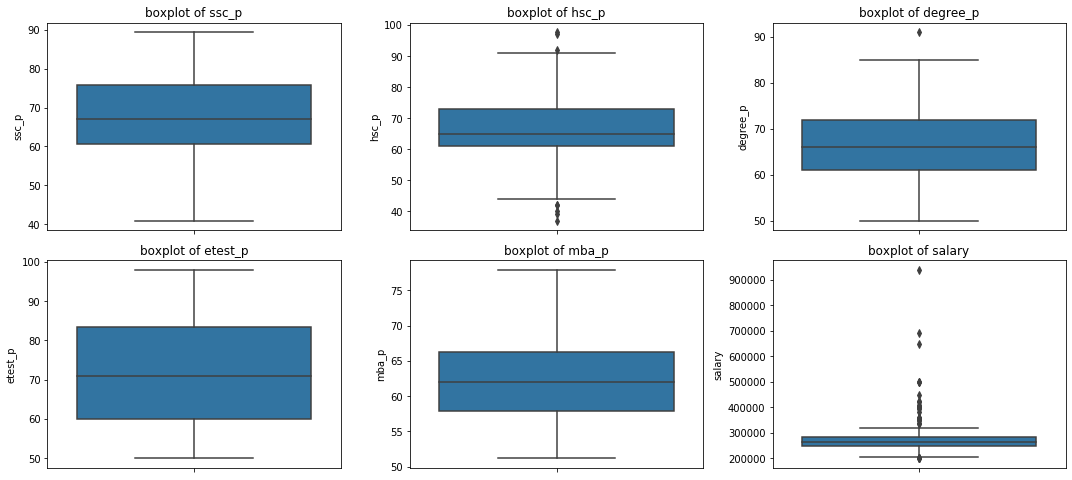

In [11]:
df_students=df_students.drop('sl_no',axis=1)# remove insignificant variable
df_students.fillna(df_students['salary'].median(),inplace=True)

plt.figure(figsize=(15,10))
for i,col in enumerate(df_students.select_dtypes(include=['float64','int64']).columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df_students[col])
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()



### 2.	Data Preparation (15 marks)

a.	Fix the defects found above and do appropriate treatment if any. (6 marks)

b.	Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (6 marks)

c.	Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? (2 marks)

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (1 mark)


In [12]:
#a)
q1=df_students['salary'].quantile(0.25)
q3=df_students['salary'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df_students['salary']=df_students['salary'].clip(lower=lower_bound,upper=upper_bound)

In [13]:
q1=df_students['hsc_p'].quantile(0.25)
q3=df_students['hsc_p'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df_students['hsc_p']=df_students['hsc_p'].clip(lower=lower_bound,upper=upper_bound)

In [14]:
q1=df_students['degree_p'].quantile(0.25)
q3=df_students['degree_p'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df_students['degree_p']=df_students['degree_p'].clip(lower=lower_bound,upper=upper_bound)

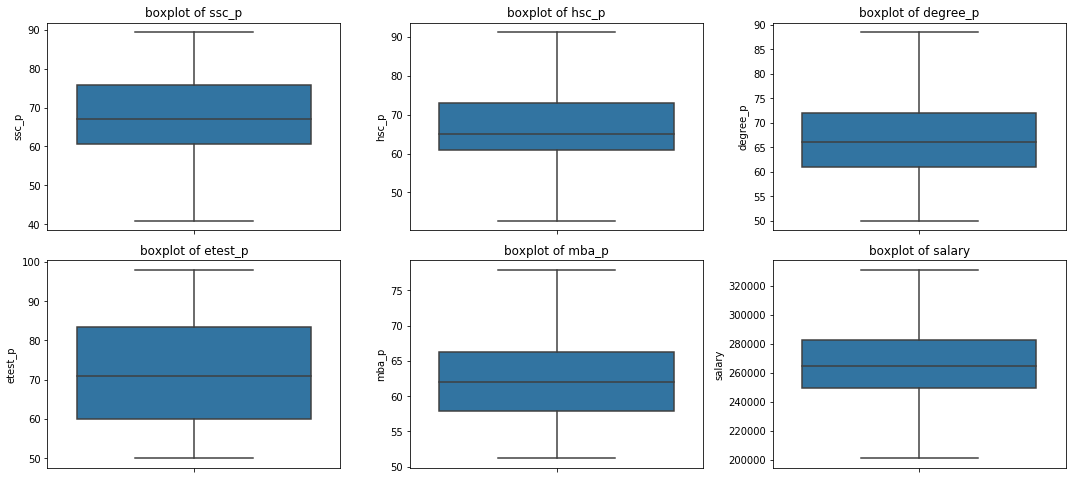

In [15]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_students.select_dtypes(include=['float64','int64']).columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df_students[col])
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()

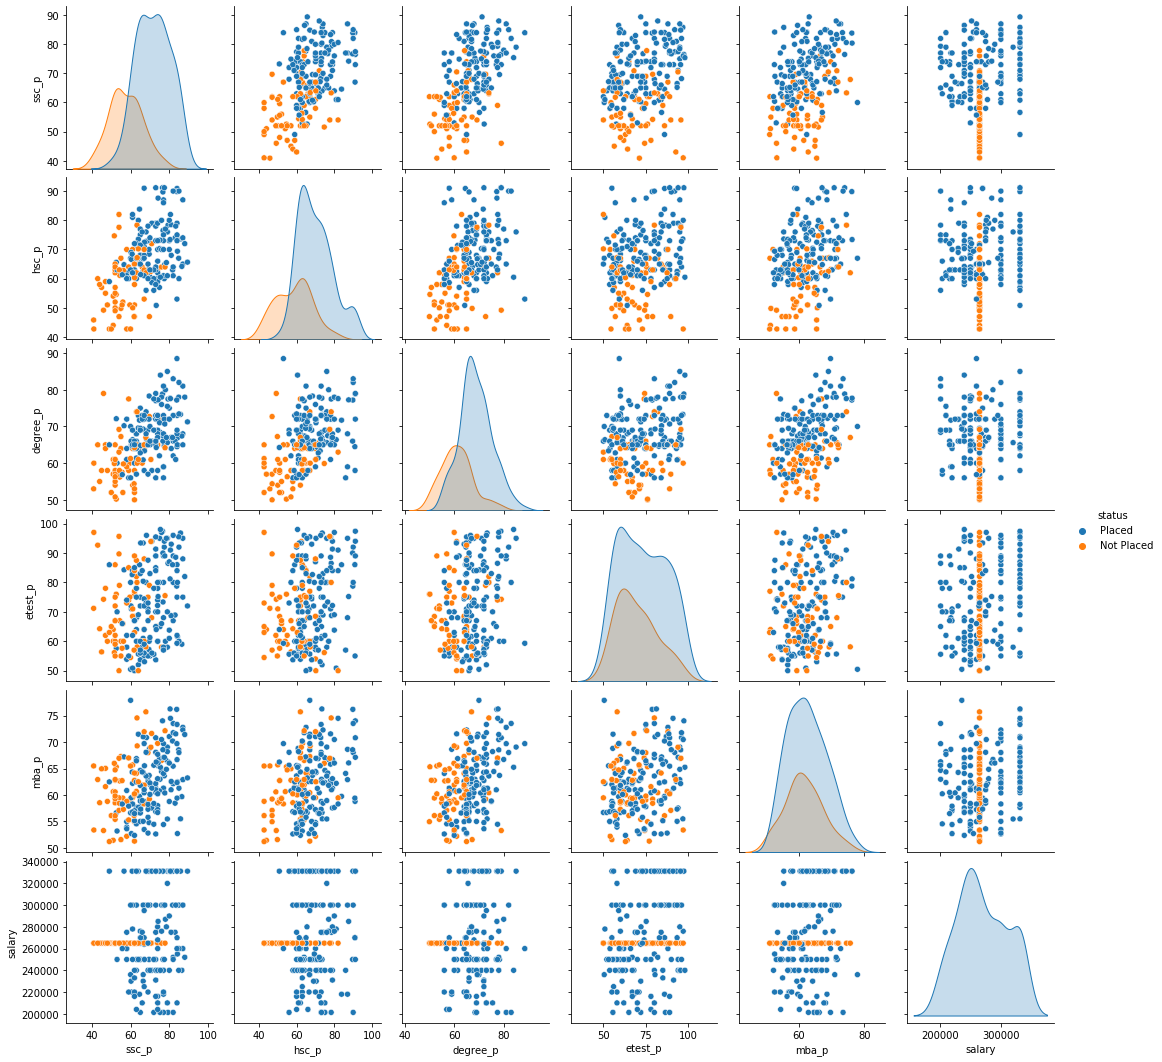

In [16]:
#b
sns.pairplot(df_students,hue='status', vars=['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary'])
plt.show()

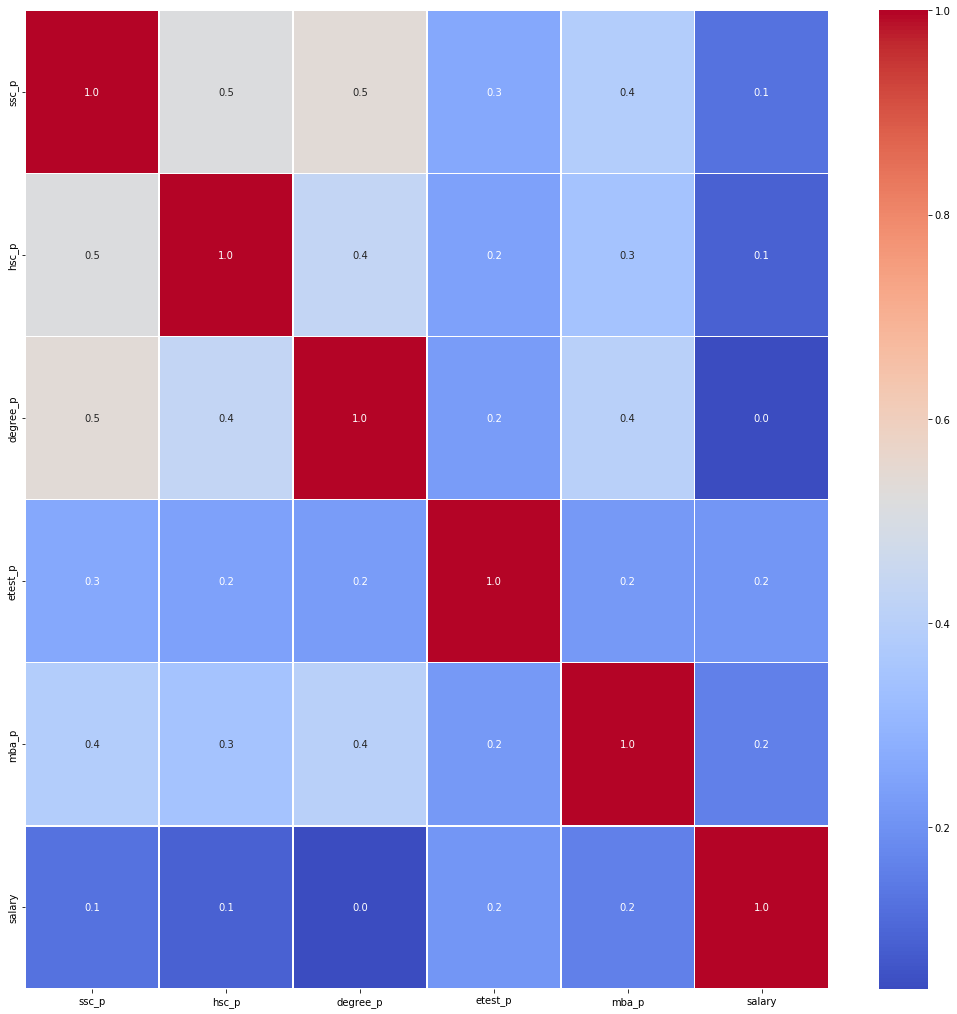

In [17]:

f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_students.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax,cmap='coolwarm')

In [18]:
#c)
df_students=pd.get_dummies(df_students,drop_first=True)
df_students.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,201250.0,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,331250.0,1,0,0,1,0,0,0,0,0,1


In [19]:
df_students.status_Placed.value_counts(normalize=True)

1    0.688372
0    0.311628
Name: status_Placed, dtype: float64

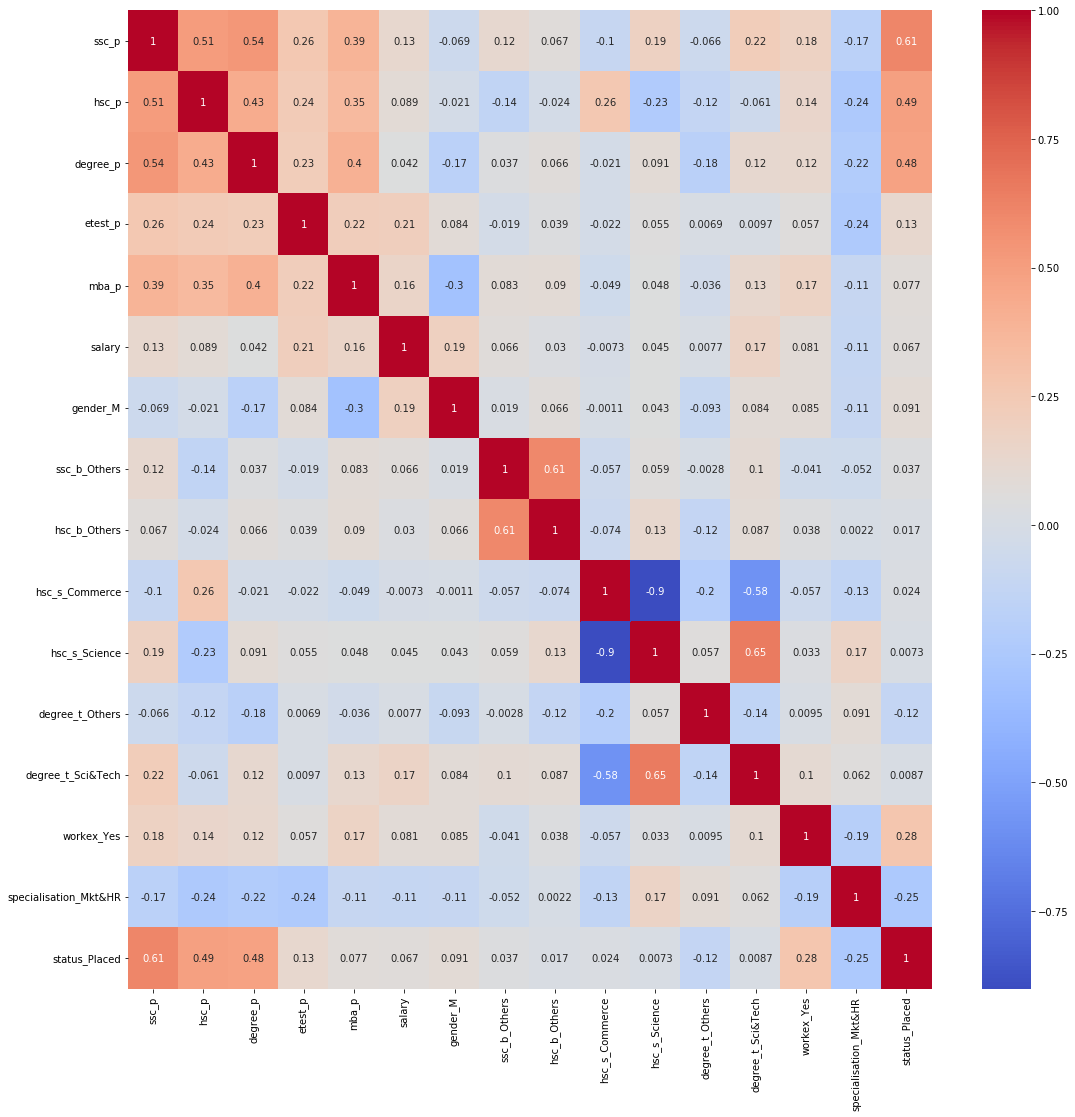

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(df_students.corr(),annot=True,cmap='coolwarm')

In [21]:
df_students.shape

(215, 16)

In [22]:
from sklearn.compose import make_column_transformer
stand_scale=df_students.drop(['status_Placed'],axis=1)
col_trans=make_column_transformer((StandardScaler(),stand_scale.columns),remainder='passthrough')

<IPython.core.display.Javascript object>

In [23]:
#d)
X=df_students.drop(['status_Placed'],axis=1)
y=df_students['status_Placed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=0)
df_students.head()

<IPython.core.display.Javascript object>

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,201250.0,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,331250.0,1,0,0,1,0,0,0,0,0,1


In [24]:
col_trans.fit_transform(X_train)

array([[ 0.60105428,  1.13677619,  0.83080083, ..., -0.60235526,
        -0.71400555, -0.90097986],
       [ 1.09237235,  0.95479463,  1.91275112, ..., -0.60235526,
        -0.71400555, -0.90097986],
       [ 0.96462965,  2.11037754,  0.01933811, ..., -0.60235526,
         1.40054934, -0.90097986],
       ...,
       [ 0.99410874,  0.77281306,  0.96604461, ...,  1.66014986,
        -0.71400555, -0.90097986],
       [-0.38158186, -0.59204865, -1.19785598, ..., -0.60235526,
         1.40054934, -0.90097986],
       [ 0.60105428, -0.77403021, -1.33309976, ..., -0.60235526,
        -0.71400555,  1.10990272]])

In [25]:
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,201250.0,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,331250.0,1,0,0,1,0,0,0,0,0


In [26]:
X.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.334744,66.358558,72.100558,62.278186,268289.534884,0.646512,0.460465,0.609302,0.525581,0.423256,0.051163,0.274419,0.344186,0.441860
std,10.827205,10.586016,7.321524,13.275956,5.833385,33324.764090,0.479168,0.499598,0.489045,0.500510,0.495228,0.220844,0.447262,0.476211,0.497767
min,40.890000,42.750000,50.000000,50.000000,51.210000,201250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,89.400000,91.150000,88.500000,98.000000,77.890000,331250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.	Model Building (15 marks)

a.	Fit a base model and explain the reason of selecting that model. Please write your key observations. (3 marks)

b.	What is the overall Accuracy? Please comment on whether it is good or not.  (2 mark)

c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (3 marks) 

d.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (5 marks)

e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (2 marks)



In [27]:
#Logistic Regression
from sklearn.pipeline import make_pipeline
logreg=LogisticRegression(solver='lbfgs')
pipe=make_pipeline(col_trans,logreg)

In [28]:
print('Accuracy score on Train data: {}'.format(cross_val_score(pipe,X_train,y_train,cv=10,scoring='accuracy').mean()*100))

Accuracy score on Train data: 88.95833333333334


In [29]:
pipe=make_pipeline(col_trans,logreg)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy score on test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

<IPython.core.display.Javascript object>

Accuracy score on test data: 85.24590163934425


In [30]:
# K nearest Neigbors Classifier
knn_scores = []
for k in range(1,31):
    knn_classifier =KNeighborsClassifier(n_neighbors=k)
    pipe=make_pipeline(col_trans,knn_classifier)
    knn_scores.append(cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean())

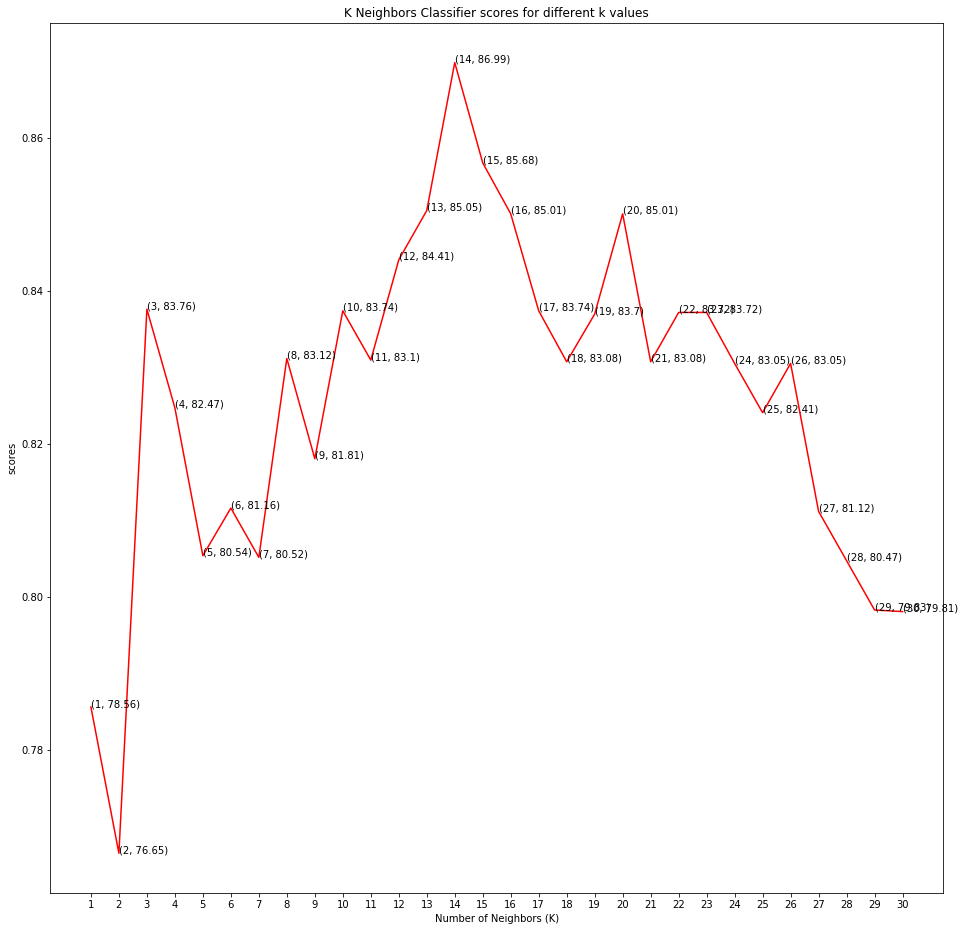

In [31]:
plt.figure(figsize=(16,16))
plt.plot([k for k in range(1,31)],knn_scores,color='red')
for i in range(1,31):
    plt.text(i,knn_scores[i-1],(i,round(knn_scores[i-1]*100,2)))
    plt.xticks([i for i in range(1,31)])
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('scores')
    plt.title('K Neighbors Classifier scores for different k values')

In [32]:
print('Accuracy score on Train data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

<IPython.core.display.Javascript object>

Accuracy score on Train data: 85.24590163934425


In [33]:
knn_classifier=KNeighborsClassifier(n_neighbors=4)
pipe=make_pipeline(col_trans,knn_classifier)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accuracy score on Train data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

<IPython.core.display.Javascript object>

Accuracy score on Train data: 81.9672131147541


In [35]:
#b)
pipe.fit(X_train,y_train)
y_pred_train=pipe.predict(X_train)
pipe.fit(X_train,y_train)
y_pred_test=pipe.predict(X_test)
from sklearn.metrics import classification_report
print("Train Classification Report:\n",classification_report(y_train,y_pred_train))
print("Train Classification Report:\n",classification_report(y_test,y_pred_test))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        48
           1       0.96      0.87      0.91       106

    accuracy                           0.88       154
   macro avg       0.86      0.89      0.87       154
weighted avg       0.90      0.88      0.89       154

Train Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.86      0.88      0.87        42

    accuracy                           0.82        61
   macro avg       0.79      0.78      0.79        61
weighted avg       0.82      0.82      0.82        61



In [36]:
#c
from sklearn.metrics import precision_score,recall_score,f1_score
print('precision Score: {}'.format(precision_score(y_test,y_pred)))
print('recall score: {}'.format(recall_score(y_test,y_pred)))
print('f1 score: {}'.format(f1_score(y_test,y_pred)))

precision Score: 0.8604651162790697
recall score: 0.8809523809523809
f1 score: 0.8705882352941177


In [37]:
from sklearn.metrics import average_precision_score
print('average precision Score: {}'.format(average_precision_score(y_test,y_pred)))

average precision Score: 0.8399960060272679


In [38]:
from sklearn.metrics import roc_auc_score
print('roc auc Score: {}'.format(roc_auc_score(y_test,y_pred)))

roc auc Score: 0.7825814536340853


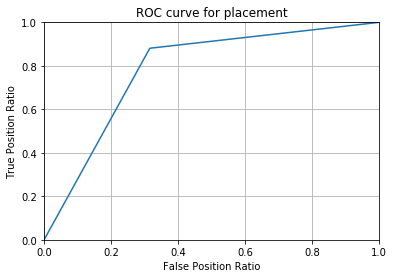

In [39]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Position Ratio')
plt.ylabel('True Position Ratio')
plt.title('ROC curve for placement')
plt.grid(True)
plt.show()

In [52]:
#d
param_grid1 ={
    'n_estimators':[100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search=GridSearchCV(estimator=RandomForestClassifier(random_state=10),param_grid=param_grid1,cv=5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

best_model=grid_search.best_estimator_

y_pred_train_best=best_model.perdict(X_train)
y_pred_test_best=best_model.perdict(X_test)

train_accuracy_best =accuracy_score(y_train,y_pred_train_best)
test_accuracy_best =accuracy_score(y_test,y_pred_test_best)

print(f'Imporved Train Accuracy: {train_accuracy_best}')
print(f'Imporved Test Accuracy: {test_accuracy_best}')

print("Improved Train Classification Report:\n",classification_report(y_train,y_pred_train_best))
print("Improved Test Classification Report:\n",classification_report(y_test,y_pred_test_best))

AttributeError: 'GridSearchCV' object has no attribute 'best_param_'

In [45]:
importance = best_model.feature_importances_
features =X.columns
feature_importances_df=pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance',y='Feature',data=feature_importances_df)
plt.title('Feature Importance')
plt.show()

NameError: name 'importances' is not defined